In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pandas as pd
import os
import time

### Define a function to fetch MAST data from TESScut via cURL command.

In [1]:
mast_data_path = '/Users/waderoemer/Desktop/MScThesis/MAST_data'

def get_mast_data(ra,dec):
    curl_cmd = f'curl -O "https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra={ra}&dec={dec}&y=5&x=5"'
    #fetch the data from MAST using a cURL command
    os.system('cd MAST_data\n' + curl_cmd)
    
    #append '.zip' to the filename, otherwise the computer doesn't know how to handle the file
    os.system(f'mv {mast_data_path}/astrocut\?ra={ra}\&dec={dec}\&y=5\&x=5 {mast_data_path}/astrocut\?ra={ra}\&dec={dec}\&y=5\&x=5.zip')
    
    #decompress the .zip file
    os.system(f'open {mast_data_path}/astrocut\?ra={ra}\&dec={dec}\&y=5\&x=5.zip')
    time.sleep(5) #need time for decompression, or else the line below will delete it before it's done
    
    #delete the original .zip file
    os.system(f'rm {mast_data_path}/astrocut\?ra={ra}\&dec={dec}\&y=5\&x=5.zip')

#### Loop over all source positions in the KiDS catalog. NOTE: If you run this cell, you will download ~2000 files to your machine.

In [ ]:
kids_data = pd.read_csv('KiDS_lenses.csv',skiprows=7)

for i in range(len(kids_data)):
    ra = kids_data['RA'][i]
    dec = kids_data['DEC'][i]
    get_mast_data(ra,dec)

### Define a function to plot the lightcurve of the center pixel and the first frame of the FFI.

In [35]:
# this needs quite a bit of work... but it at least works for now

def generate_lc_and_image(filepath):
    #open fits file
    tphdu = fits.open(filepath)
    #select the PIXELS column
    tpf_data = tphdu[1].data
    first_image = tpf_data['FLUX'][1]
    #define wcs for sky coordinates on the image
    wcs = WCS(tphdu[2].header)
    #plot the image
    fig = plt.figure(figsize = (6,6))
    fig.add_subplot(111, projection = wcs)
    plt.imshow(first_image, origin = 'lower', cmap = plt.cm.viridis)
    plt.xlabel('RA', fontsize = 14)
    plt.ylabel('Dec', fontsize = 14)
    plt.grid(axis = 'both', color = 'white', ls = 'solid')
    
    #extract flux values for our pixel (the values are nested)
    flux = []
    for i in range(len(tpf_data['FLUX'])):
        ## !! see comment below !!
        flux_i = tpf_data['FLUX'][i][0][0] ## these indices will need to change when we get 5x5 pixel images!
        flux.append(flux_i)
    plt.figure(figsize=[16,4])
    plt.plot(tpf_data['TIME'],flux)
    plt.xlabel('Time [days]',fontsize=12)
    plt.ylabel('Flux [e-/s]',fontsize=12)
    #plt.title(filepath.replace(directory,'')) #pretty this up later

In [34]:
directory = '/Users/waderoemer/Desktop/MScThesis/astrocut_333'
file = 'tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits'
filepath = f'{directory}/{file}'
hdu = fits.open(filepath)
hdu.info()
hdu['PRIMARY'].header['SECTOR']

Filename: /Users/waderoemer/Desktop/MScThesis/astrocut_333/tess-s0028-1-2_333.412570_-33.198980_1x1_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   3464R x 12C   [D, E, J, 1J, 1E, 1E, 1E, 1E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        81   (1, 1)   int32   


28

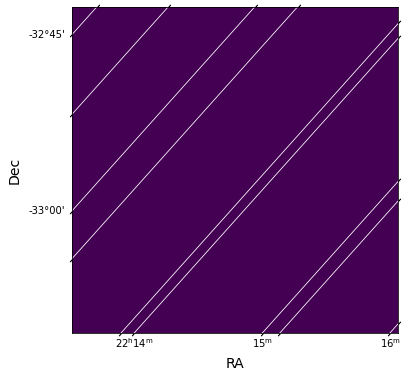

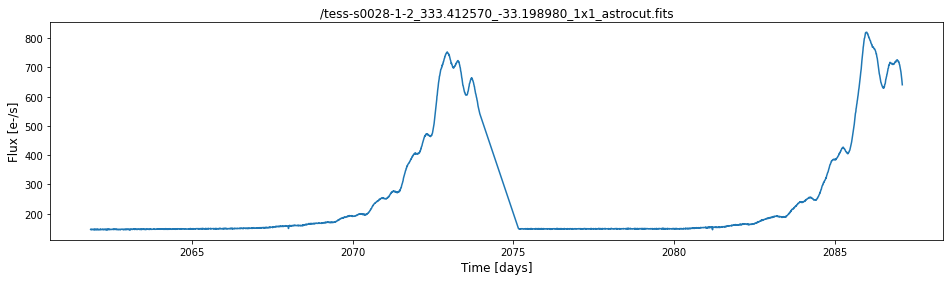

In [5]:
generate_lc_and_image(filepath)

In [6]:
# maybe tidy this up by creating one cohesive plot (use plt.subplots) -- make image and lc the same width and 
# just stack them

# the image I am currently displaying is just the first frame, do we want to integrate over all images,
# use an animation, use a median pixel value, show the max and min flux pixels, or ...?
#   --> stack all images and normalize (I think that's what Benne said? -- double-check)

In [8]:
#data = fits.open(filepath2)[1].data
hdu2 = fits.open(filepath2)
hdu2.info()

Filename: /Users/waderoemer/Desktop/MScThesis/astrocut_333/tess-s0001-1-2_333.412570_-33.198980_1x1_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   1282R x 12C   [D, E, J, 1J, 1E, 1E, 1E, 1E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        81   (1, 1)   int32   
